In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import LinearSVC
import warnings
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
bstn=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [5]:
bstn['MEDV']=boston.target

In [6]:
bstn.shape

(506, 14)

In [7]:
bstn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


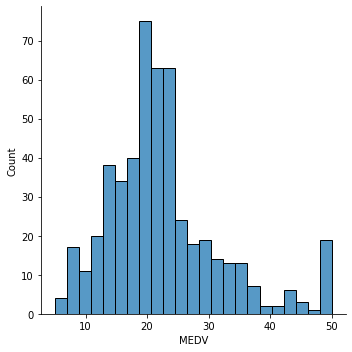

In [8]:
sns.displot(bstn['MEDV'])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
bstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
bstn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


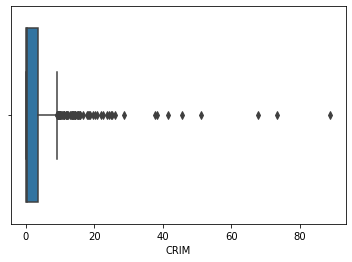

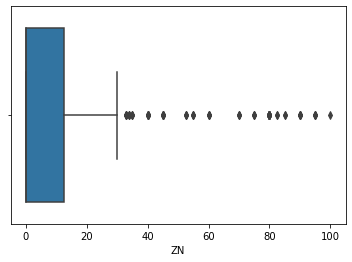

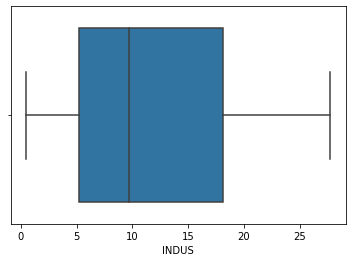

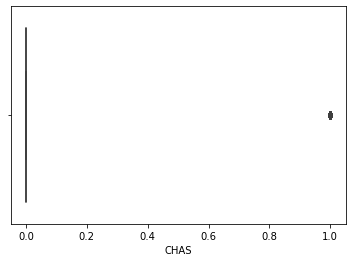

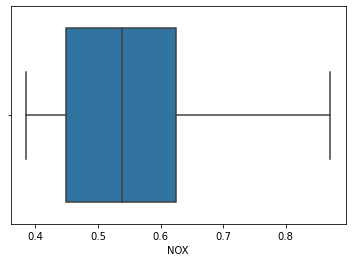

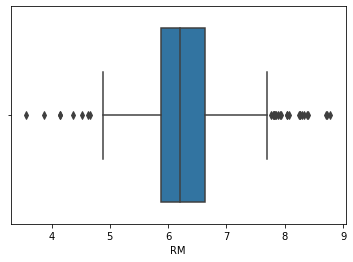

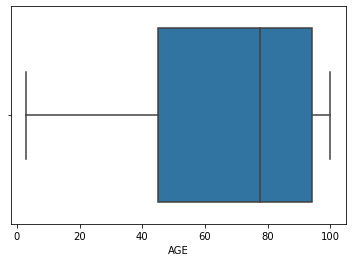

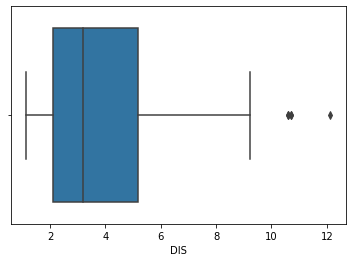

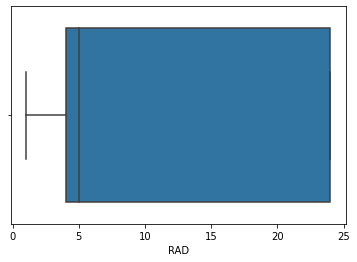

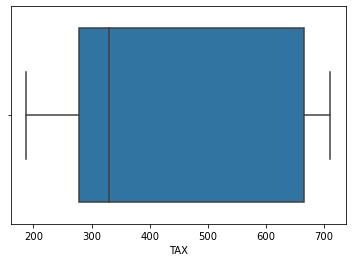

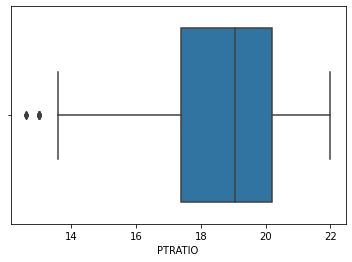

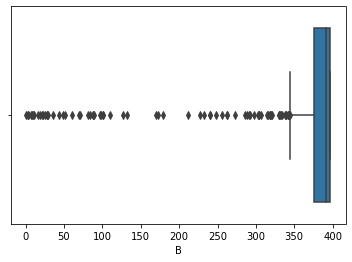

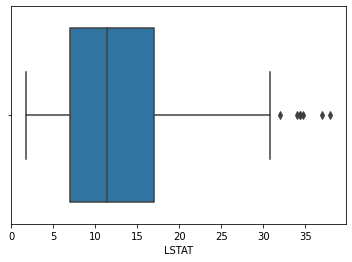

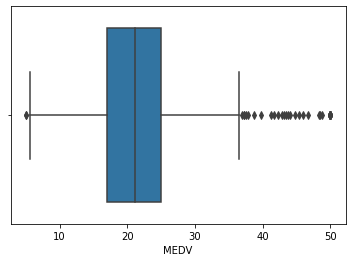

In [12]:
for i in bstn.columns:
    plt.figure()
    sns.boxplot(bstn[i])

In [13]:
X_crime=bstn[bstn.columns[:-1]]
y_crime=bstn.MEDV

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

In [15]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79


In [16]:
y_train.shape

(379,)

In [17]:
scaler=StandardScaler()
# scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [18]:
df=X_train.copy()
df.shape

(379, 13)

In [19]:
scaled_df = pd.DataFrame(data=df,columns=bstn.columns[:-1])
scaled_df['MEDV']=scaler.fit_transform(np.array(y_train).reshape(-1,1))

<AxesSubplot:>

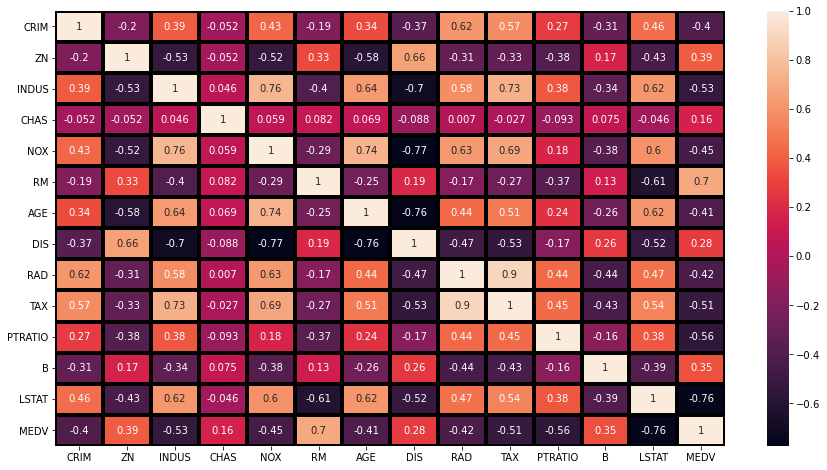

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df.corr(),linewidths=3,annot=True,linecolor='black')

In [21]:
# sns.pairplot(scaled_df)

In [22]:
selected_feature=scaled_df.columns

In [23]:
selected_feature=selected_feature[:-1]
selected_feature

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
 selected_feature=scaled_df.corr()[(scaled_df.corr()['MEDV']>0.5) | (scaled_df.corr()['MEDV']<-0.4) ].index

In [25]:
selected_feature

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT',
       'MEDV'],
      dtype='object')

In [26]:
X_crime=scaled_df[selected_feature[:-1]]
y_crime=scaled_df['MEDV']

In [27]:
X_train.shape

(379, 13)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: 0.00013707238222436177
linear model coeff:
[ 0.04528406  0.13524231 -0.16764537  0.30623412  0.11393659  0.17504606
 -0.21495175 -0.29418395 -0.50501141]
R-squared score (training): 0.739
R-squared score (test): 0.647


In [29]:
alphas=list(np.arange(0,150,5))


In [30]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
296,-0.396247,-0.153091,-0.078952,-0.840005,-0.125477,-0.393739,0.168172,-0.315069,0.147878
179,-0.409106,-0.821923,-1.302822,-0.149728,-1.328568,-0.393739,-0.644250,-0.863245,-0.751577
92,-0.410490,-0.572359,-0.751218,1.259707,-0.270984,-0.855386,-0.942333,-0.315069,-1.183927
186,1.324183,1.000608,0.498508,-0.120847,0.683681,1.683670,1.535846,0.781284,0.078368
199,-0.406205,0.120716,0.145137,0.404803,0.012932,-0.970798,-0.761145,1.146735,-0.399858


In [31]:
test_size=np.linspace(0.1,0.9,9)
test_size

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<b> Linear Regression </b>

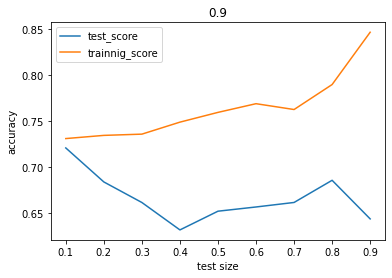

In [32]:
test_l1=[]
train_l2=[]
for j in test_size:
    
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=j,
                                                       random_state=0)
    test_score=[]
    train_score=[]
    for i in (1,100):

        LinearRegressionR = LinearRegression().fit(X_train, y_train)
        train_score.append(LinearRegressionR.score(X_train, y_train))
        test_score.append(LinearRegressionR.score(X_test,y_test))

    
    train_l2.append(np.mean(train_score))
    test_l1.append(np.mean(test_score))
plt.plot(test_size,test_l1)
plt.plot(test_size,train_l2)
plt.xlabel('test size')
plt.ylabel('accuracy')
plt.title(j)
plt.legend(['test_score','trainnig_score'])
plt.show()


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=0.30,
                                                       random_state=0)
LinearRegressionR = LinearRegression().fit(X_train, y_train)
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(LinearRegressionR.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(LinearRegressionR.coef_))
print('R-squared score (training): {:.3f}'
     .format(LinearRegressionR.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(LinearRegressionR.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(LinearRegressionR.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 0.009716458078186472
ridge regression linear model coeff:
[ 0.0520231   0.15194495 -0.17807134  0.30072248  0.11119923  0.18230104
 -0.22614764 -0.30484785 -0.50963821]
R-squared score (training): 0.736
R-squared score (test): 0.661
Number of non-zero features: 9


<b> Ridge Regression </b>

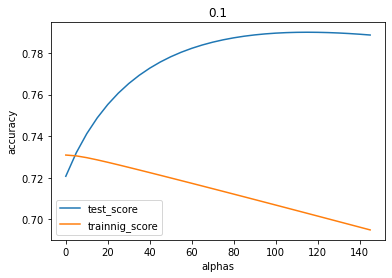

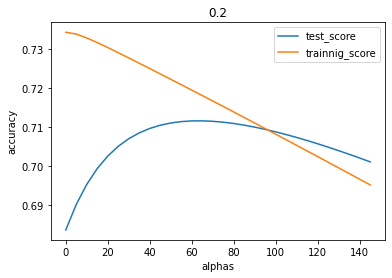

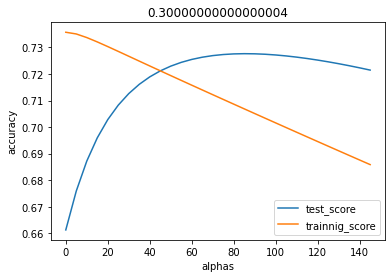

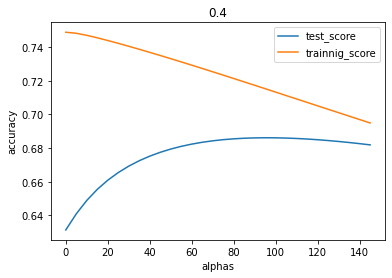

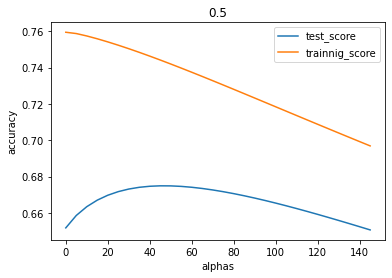

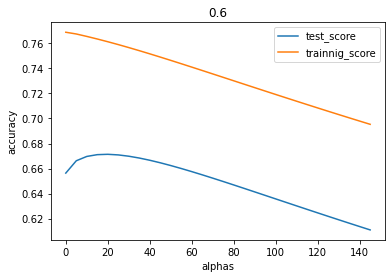

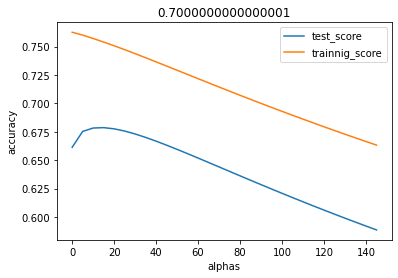

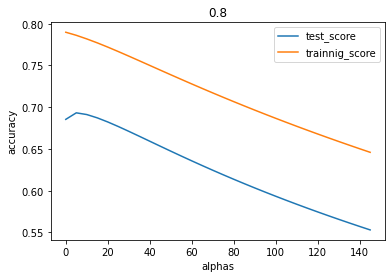

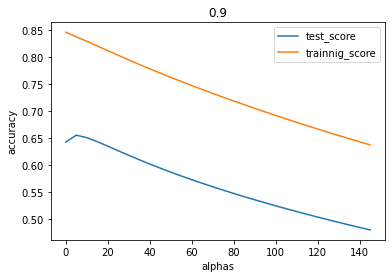

In [34]:
for j in test_size:
    
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=j,
                                                       random_state=0)
    test_score=[]
    train_score=[]
    for i in alphas:

        linridge = Ridge(alpha=i).fit(X_train, y_train)
        train_score.append(linridge.score(X_train, y_train))
        test_score.append(linridge.score(X_test,y_test))


    plt.plot(alphas,test_score)
    plt.plot(alphas,train_score)
    plt.xlabel('alphas')
    plt.ylabel('accuracy')
    plt.title(j)
    plt.legend(['test_score','trainnig_score',f'test_size={j}'])
    plt.show()


In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=0.30,
                                                       random_state=0)
linridge = Ridge(alpha=45).fit(X_train, y_train)
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 0.013888603832051946
ridge regression linear model coeff:
[-0.00622705  0.02174869 -0.07424801  0.31546304  0.02510527  0.04396216
 -0.08736445 -0.24580839 -0.37037891]
R-squared score (training): 0.721
R-squared score (test): 0.721
Number of non-zero features: 9


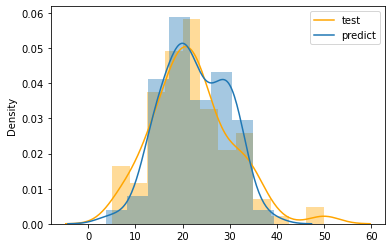

In [36]:
sns.distplot(scaler.inverse_transform(y_test),color='orange')
sns.distplot(scaler.inverse_transform(linridge.predict(X_test)))
plt.legend(['test','predict'])

<b> Lasso Regression </b>

In [37]:
alphas=list(np.arange(0,1,0.001))

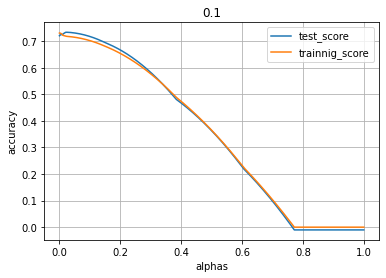

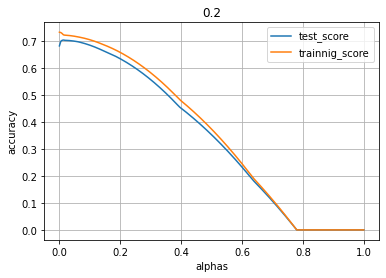

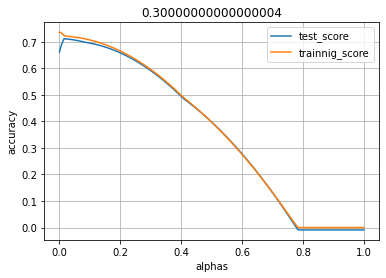

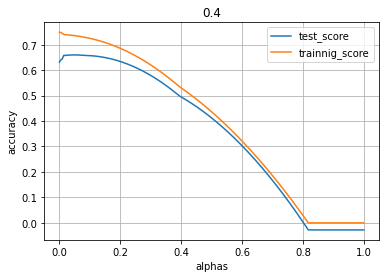

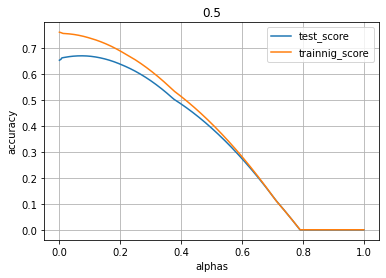

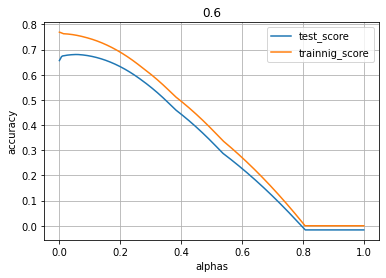

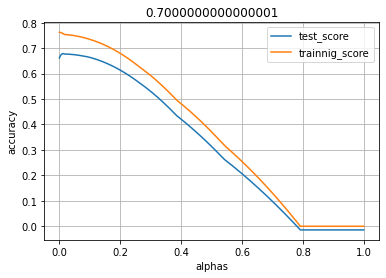

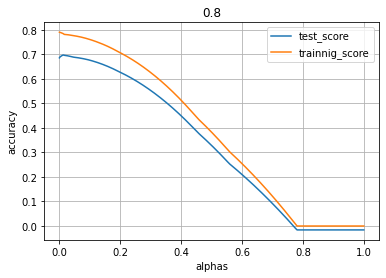

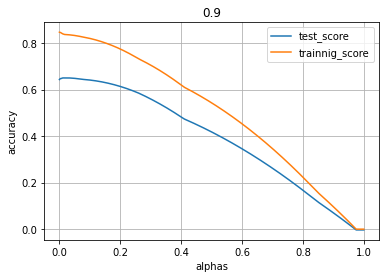

In [38]:
max_te=0
max_tn=0

for j in test_size:
    
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=j,
                                                       random_state=0)
    test_score=[]
    train_score=[]
    for i in alphas:

        LassoR = Lasso(alpha=i).fit(X_train, y_train)
        train_score.append(LassoR.score(X_train, y_train))
        test_score.append(LassoR.score(X_test,y_test))


    plt.plot(alphas,test_score)
    plt.plot(alphas,train_score)
    plt.xlabel('alphas')
    plt.ylabel('accuracy')
    plt.title(j)
    plt.grid()
    plt.legend(['test_score','trainnig_score',f'test_size={j}'])
    plt.show()


In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=0.30,
                                                       random_state=0)
LassoR = Lasso(alpha=0.023).fit(X_train, y_train)
print('Crime dataset')
print('Lasso regression linear model intercept: {}'
     .format(LassoR.intercept_))
print('Lasso regression linear model coeff:\n{}'
     .format(LassoR.coef_))
print('R-squared score (training): {:.3f}'
     .format(LassoR.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(LassoR.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(LassoR.coef_ != 0)))

Crime dataset
Lasso regression linear model intercept: 0.012142640724042548
Lasso regression linear model coeff:
[ 0.          0.         -0.00718735  0.32122824  0.          0.
 -0.02556266 -0.24027779 -0.43582112]
R-squared score (training): 0.721
R-squared score (test): 0.710
Number of non-zero features: 5


In [40]:
X_test.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')